<a href="https://colab.research.google.com/github/yohancsx/SmartMask/blob/main/data%20processing/DataCollectionVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import pandas as pd
from google.colab import files
import io

#change default plot size
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


In [20]:
#import the data from the CSV file(s)
uploaded = files.upload()


Saving MDATAYohantrial2.CSV to MDATAYohantrial2.CSV


In [21]:
#the name for the breathing data
dataFile = 'MDATAYohantrial2.CSV'

#imports the data
dfData = pd.read_csv(io.BytesIO(uploaded[dataFile]))
dfData.columns = ['pressure','proximity','RMS','breathing type']

display("done loading data")
display(dfData)

#split the data into the columns and make numpy arrays
pressure = dfData['pressure'].to_numpy()
proximity = dfData['proximity'].to_numpy()
RMS = dfData['RMS'].to_numpy()
breathing_type = dfData['breathing type'].to_numpy()

'done loading data'

,pressure,proximity,RMS,breathing type
0,100.73,0.0,0,0
1,100.73,0.0,0,0
2,100.73,0.0,0,0
3,100.73,0.0,0,0
4,100.73,0.0,0,0
...,...,...,...,...
13311,100.73,0.0,0,4
13312,100.73,0.0,0,4
13313,100.73,0.0,0,4
13314,100.73,0.0,0,4


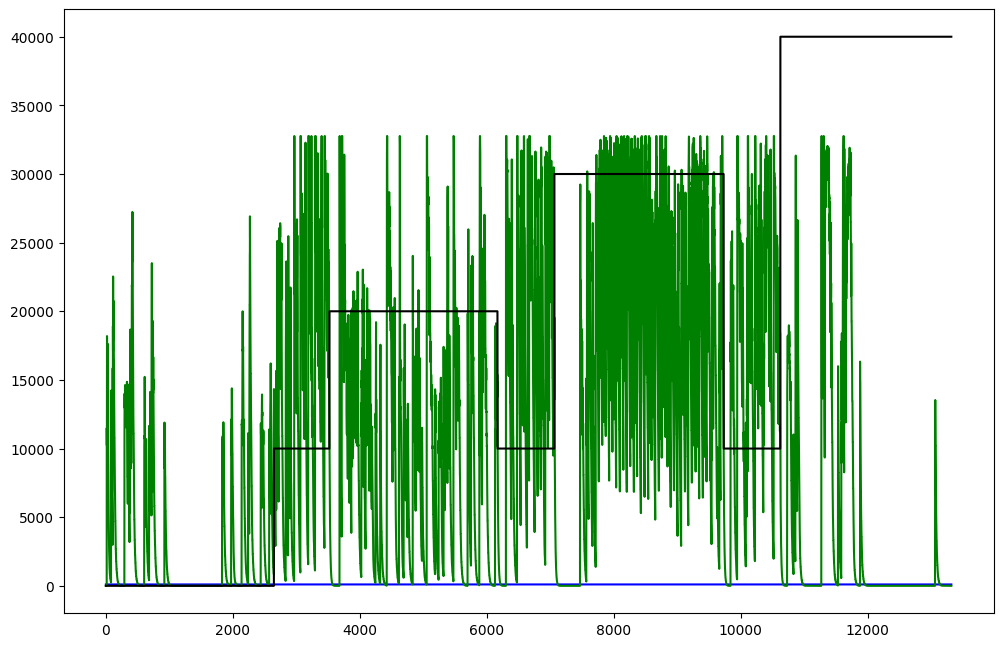

In [23]:
#get the time series in ms
t = np.arange(0, 13316, 1)
  
# plot the x and y using plot function
l = plt.plot(t, pressure,'b',t, RMS,'g',t, breathing_type*10000,'k')
  
  
# Display the plot
plt.show()

In [27]:
#do some basic splitting of the data and plot
coughing  = -1*np.ones([6000,1])
breathing  = -1*np.ones([6000,1])
talking = -1*np.ones([6000,1])
heavy_breathing = -1*np.ones([6000,1])
deep_breathing = -1*np.ones([6000,1])

i = 0
ci = 0
bi = 0
ti = 0
hbi = 0
dbi = 0
while i < RMS.size:
    if breathing_type[i] == 0:
      breathing[bi] = RMS[i]
      bi = bi + 1
    elif breathing_type[i] == 1:
      coughing[ci] = RMS[i]
      ci = ci + 1
    elif breathing_type[i] == 2:
      talking[ti] = RMS[i]
      ti = ti + 1
    elif breathing_type[i] == 3:
      heavy_breathing[hbi] = RMS[i]
      hbi = hbi + 1
    elif breathing_type[i] == 4:
        deep_breathing[dbi] = RMS[i]
        dbi = dbi + 1


#remove all the negative numbers from the arrays to reduce their size
coughing  = coughing[coughing > 0]
breathing  = breathing[breathing > 0]
talking = talking[talking > 0]
heavy_breathing = heavy_breathing[heavy_breathing > 0]
deep_breathing = deep_breathing[deep_breathing > 0]

#display the data


SyntaxError: ignored

In [ ]:
#export the data